 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sbn
%matplotlib inline
# print with line break
pd.set_option('display.expand_frame_repr', False)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","").astype("float")
print(sp500_df.head())
sp500_df.dtypes

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


/Users/tjyang/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.columns = ['S&P 500']
daily_returns_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp500], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for each portfolio'}, xlabel='Date'>

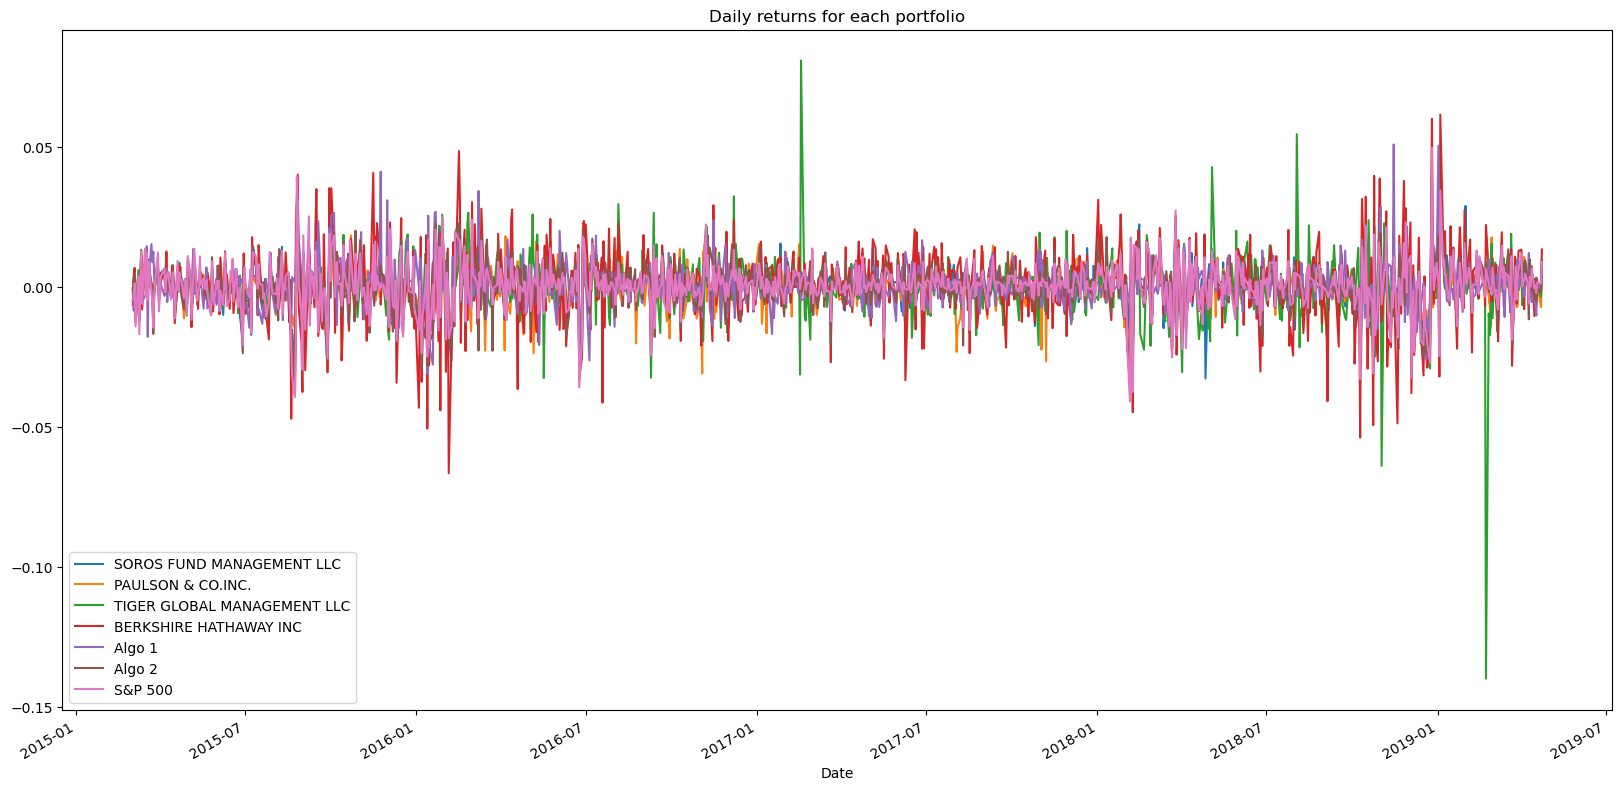

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily returns for each portfolio')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns of each portfolio'}, xlabel='Date'>

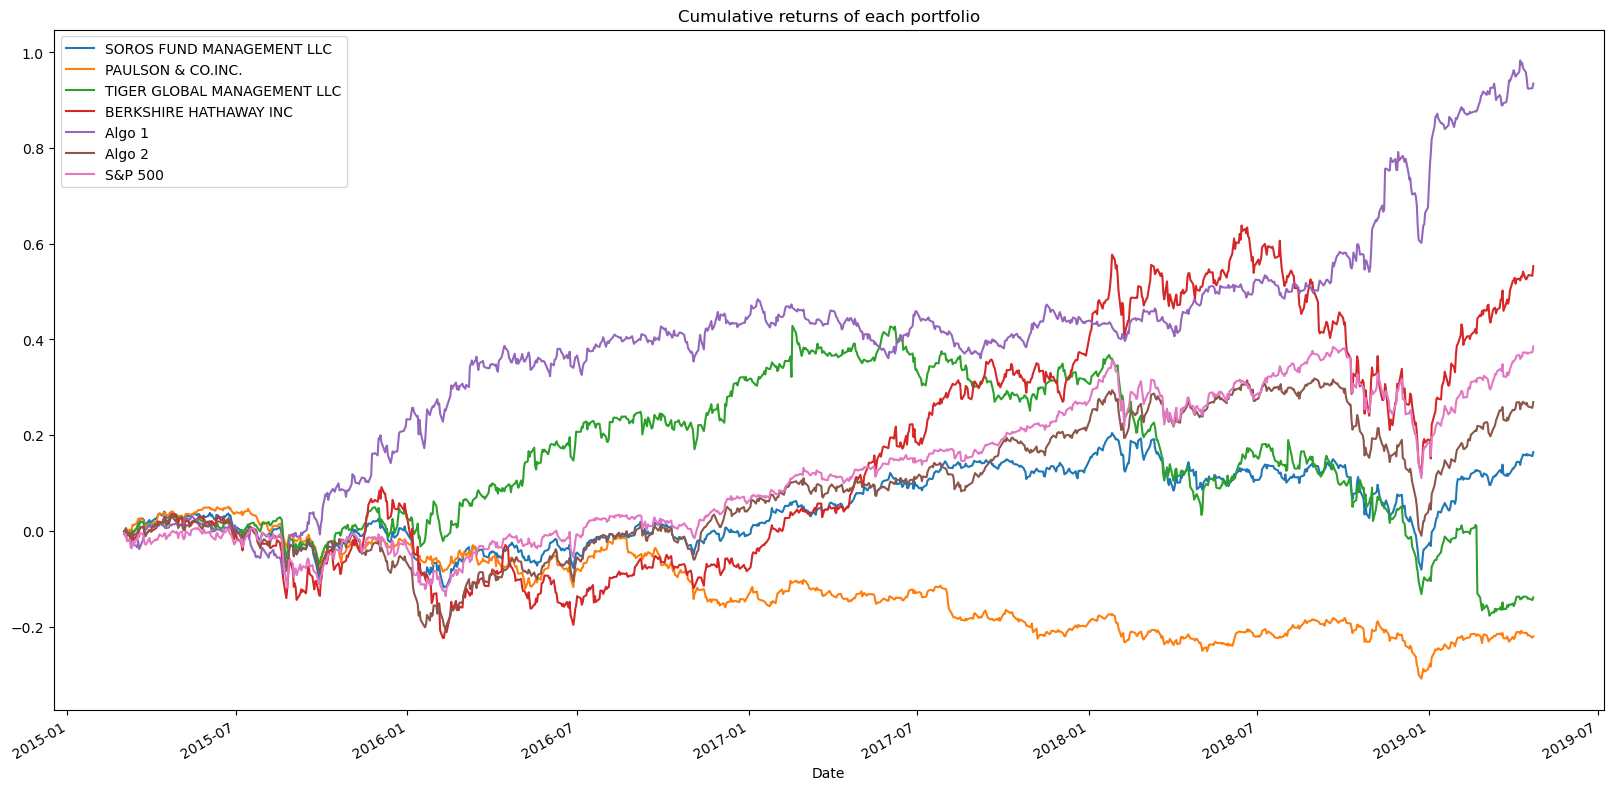

In [16]:
# Calculate cumulative returns of all portfolios
cumu_returns = (1 + combined_df).cumprod()-1
# Plot cumulative returns
cumu_returns.plot(figsize=(20,10), title='Cumulative returns of each portfolio')

In [17]:
# Create a summary table
performance_summary = pd.DataFrame()
performance_summary['Annualized return'] = combined_df.mean()*252
#performance_summary

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


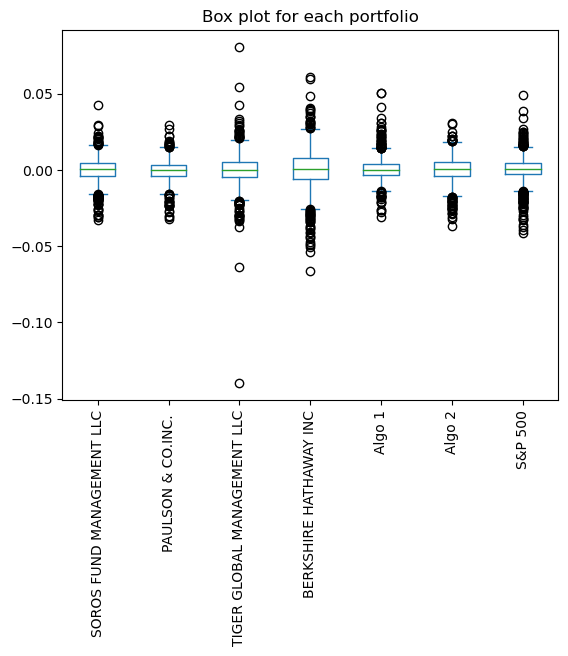

In [18]:
# Box plot to visually show risk
ax = combined_df.plot.box(title='Box plot for each portfolio')
ax.tick_params(axis='x', labelrotation=90)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
print(f"Daily standard deviation of S&P 500 is {daily_std['S&P 500']:.{2}}")
# Determine which portfolios are riskier than the S&P 500
for i, v in daily_std.items():
#    print('index: ', i, 'value: ', v)
    if i != 'S&P 500' and v > daily_std['S&P 500']:
        print(f"The daily std for {i} is {v:.{2}}, therefore it is riskier than the S&P 500")

Daily standard deviation of S&P 500 is 0.0086
The daily std for TIGER GLOBAL MANAGEMENT LLC is 0.011, therefore it is riskier than the S&P 500
The daily std for BERKSHIRE HATHAWAY INC is 0.013, therefore it is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [22]:
# add annualized std to the summary table
performance_summary['Annualized std'] = annualized_std
#performance_summary

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
Date                                                                                                                                        
2015-03-03                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-04                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-05                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-06                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-09                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
...          

<AxesSubplot:title={'center':'Rolling 21-day standard deviation'}, xlabel='Date'>

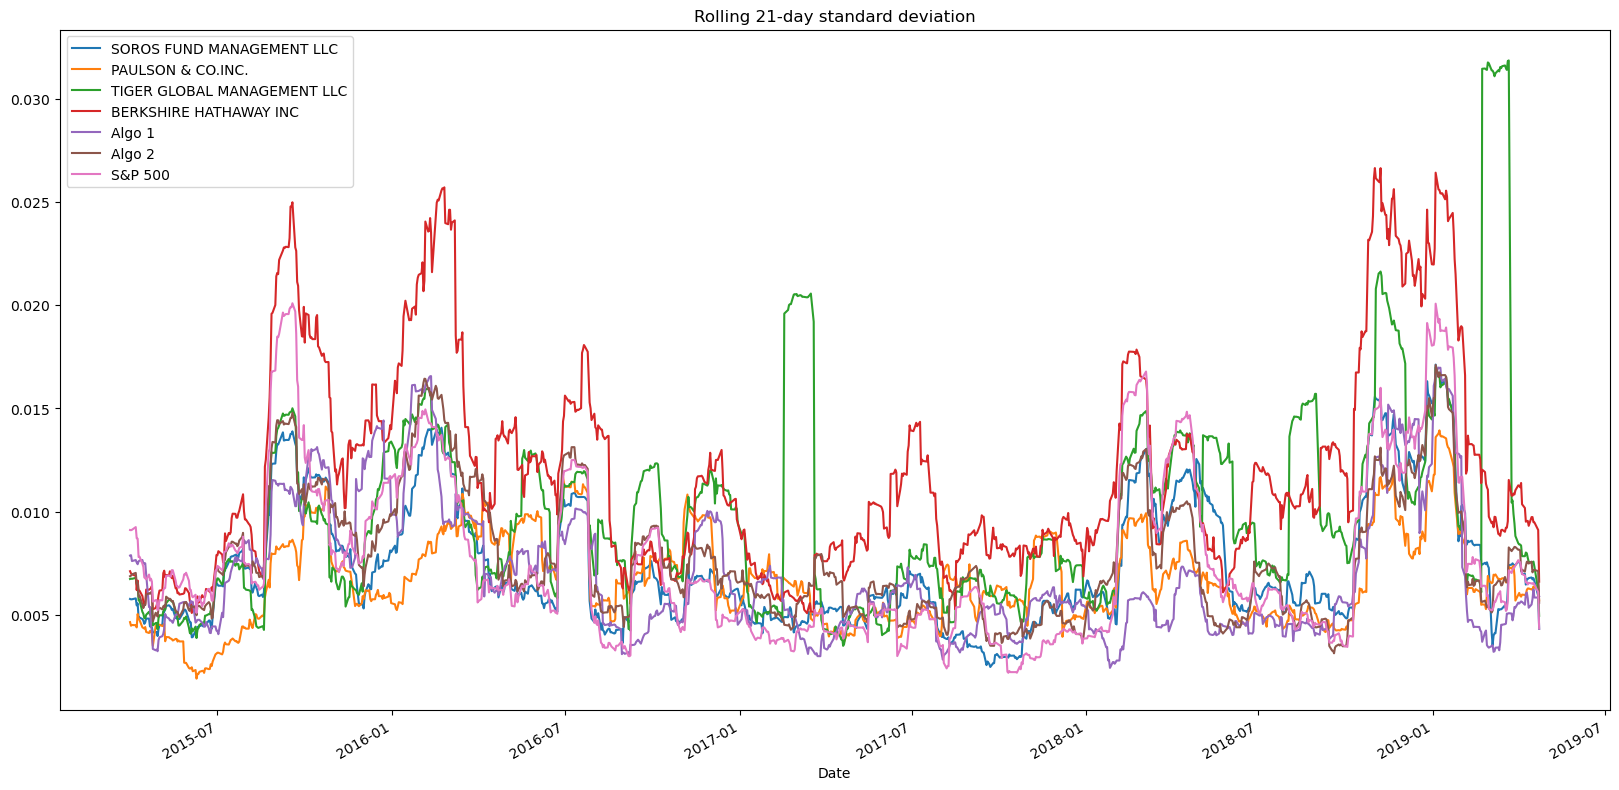

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()
print(rolling_std_21)
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10), title='Rolling 21-day standard deviation')

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914                     0.561243                0.754360  0.321211  0.826873  0.837864
PAULSON & CO.INC.                             0.699914            1.000000                     0.434479                0.545623  0.268840  0.678152  0.669732
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479                     1.000000                0.424423  0.164387  0.507414  0.623946
BERKSHIRE HATHAWAY INC                        0.754360            0.545623                     0.424423                1.000000  0.292033  0.688082  0.751371
Algo 1                                        0.321211            0.268840                     0.164387                0.292033  1.000000  0.288243  0.279494
Algo 2                                        0.8268

<AxesSubplot:>

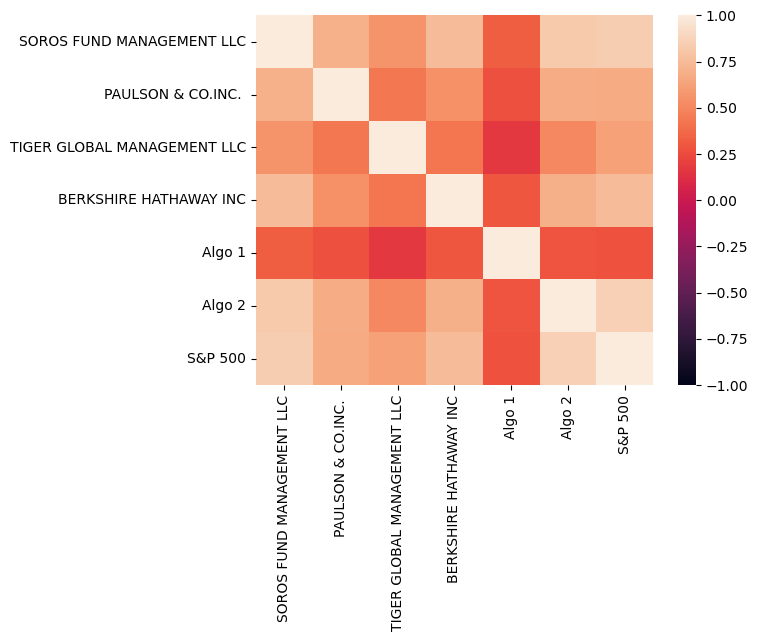

In [24]:
# Calculate the correlation
correlation = combined_df.corr()
print(correlation)
# Display de correlation matrix
sbn.heatmap(correlation, vmin = -1, vmax = 1)

In [25]:
corr_highest = 0
corr_highest_port = ''
for i, v in correlation.items():
    if i != 'S&P 500':
        corr = correlation.loc[i, 'S&P 500']
        if corr > corr_highest:
            corr_highest = corr
            corr_highest_port = i
print(f"Portfolio {corr_highest_port} has the highest correlation ({corr_highest:.{2}}) with S&P 500. It best mimics S&P 500.")

Portfolio Algo 2 has the highest correlation (0.86) with S&P 500. It best mimics S&P 500.


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
SOROS FUND MANAGEMENT LLC                     0.000062            0.000039                     0.000048                0.000077  0.000019  0.000054  0.000057
PAULSON & CO.INC.                             0.000039            0.000049                     0.000033                0.000050  0.000014  0.000040  0.000040
TIGER GLOBAL MANAGEMENT LLC                   0.000048            0.000033                     0.000119                0.000060  0.000014  0.000046  0.000058
BERKSHIRE HATHAWAY INC                        0.000077            0.000050                     0.000060                0.000167  0.000029  0.000074  0.000083
Algo 1                                        0.000019            0.000014                     0.000014                0.000029  0.000058  0.000018  0.000018
Algo 2                                  

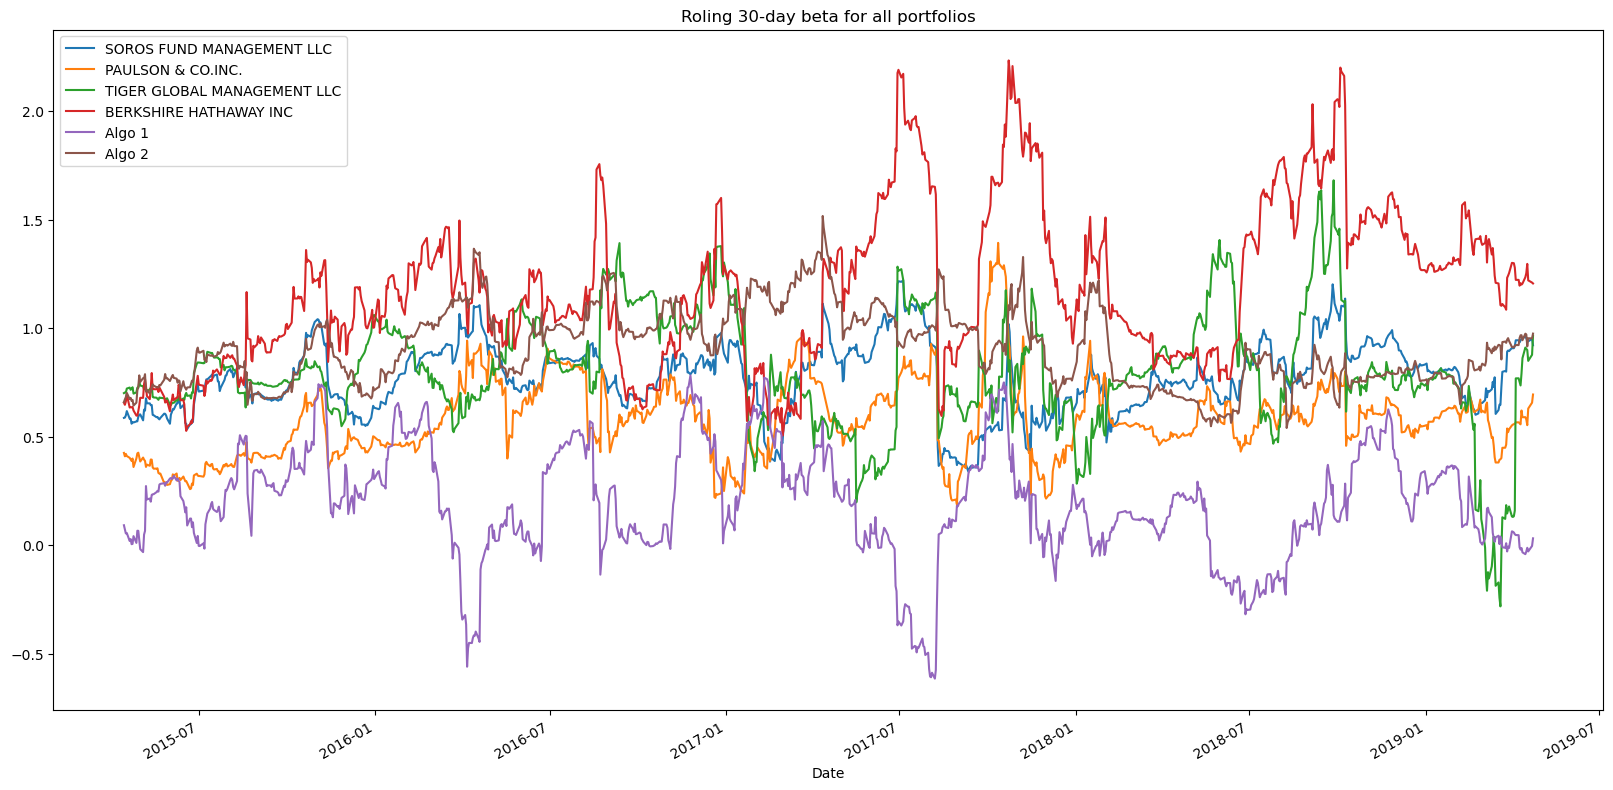

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_df.cov()
print("Covariance:")
print(covariance,'\n')

# Calculate variance of S&P 500
variance = combined_df["S&P 500"].var()
print(f"Variance of S&P 500 is {variance}\n")

# Add beta to summary table
performance_summary['Beta'] = ''

# Computing beta
for i, v in covariance.items():
    cov = covariance.loc[i, 'S&P 500']
    beta = round(cov/variance,2)
    print(f"Beta for {i} is {beta}")
    performance_summary.loc[i, 'Beta'] = beta

# Plot beta trend
rolling_variance = combined_df["S&P 500"].rolling(window=30).var()
print(f"Rolling 30-day variance of S&P 500 is {rolling_variance}\n")
for i, v in combined_df.items():
    if i != 'S&P 500':
        rolling_covariance = combined_df[i].rolling(window=30).cov(combined_df["S&P 500"])
        rolling_beta = rolling_covariance/rolling_variance
        ax = rolling_beta.plot(figsize=(20,10), label=i, title = 'Roling 30-day beta for all portfolios')
        ax.legend()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Standard Deviation'}, xlabel='Date'>

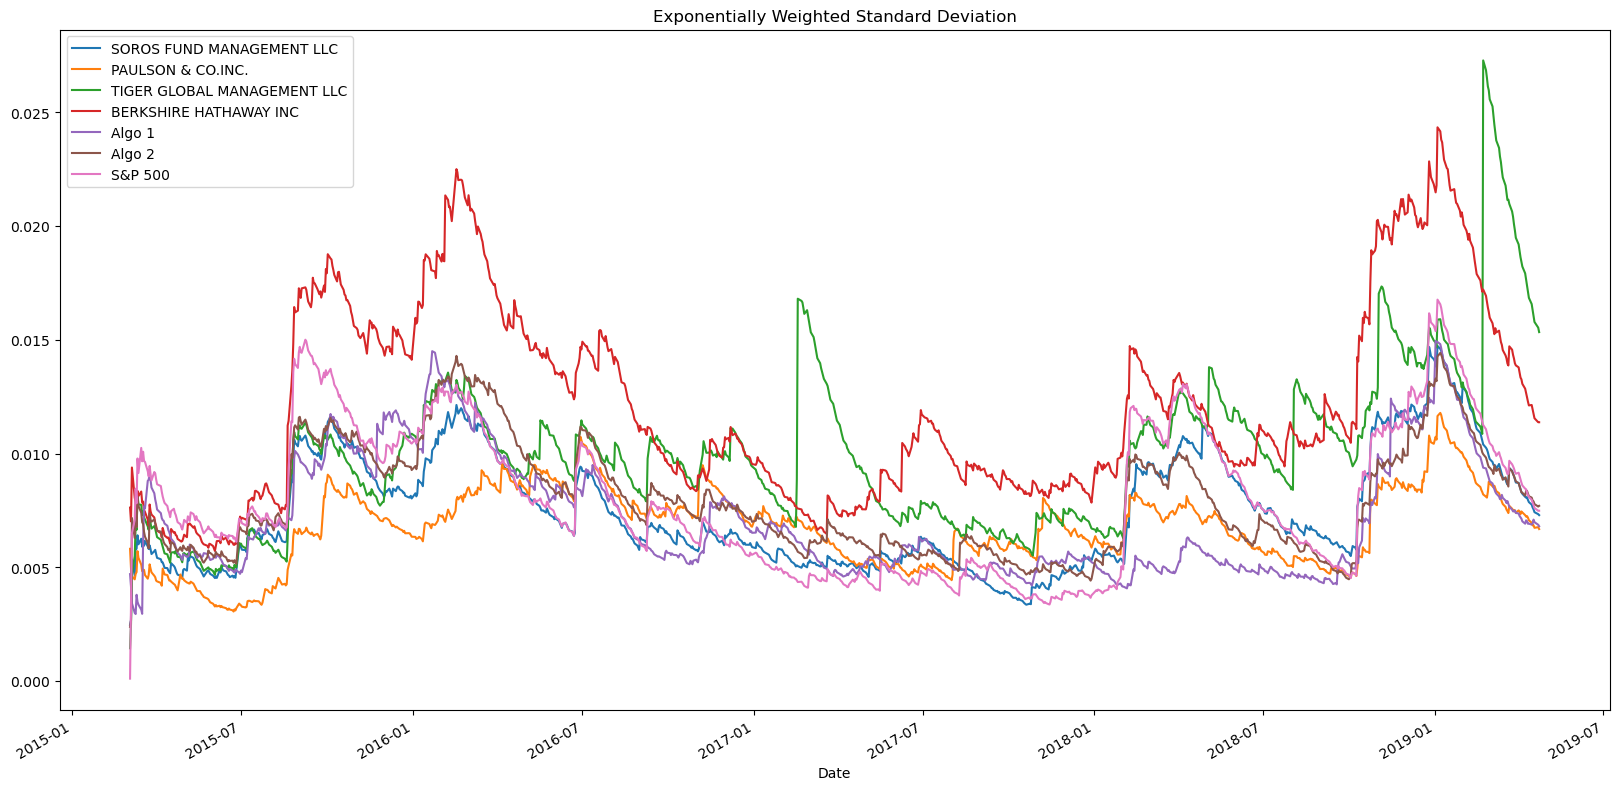

In [27]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title='Exponentially Weighted Standard Deviation')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print('Sharpe ratios:')
print(sharpe_ratios)

Sharpe ratios:
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

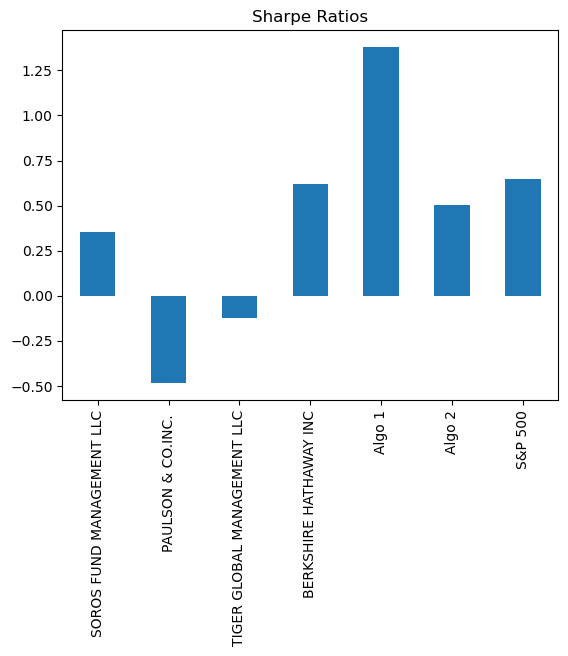

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [30]:
# Add sharpe ratio to the summary table
performance_summary['Sharpe Ratio'] = sharpe_ratios

# Print out summary table
performance_summary

,Annualized return,Annualized std,Beta,Sharpe Ratio
SOROS FUND MANAGEMENT LLC,0.044672,0.125335,0.77,0.356417
PAULSON & CO.INC.,-0.053912,0.111488,0.55,-0.483570
TIGER GLOBAL MANAGEMENT LLC,-0.020936,0.172936,0.79,-0.121060
BERKSHIRE HATHAWAY INC,0.127519,0.205077,1.13,0.621810
Algo 1,0.166771,0.120967,0.25,1.378648
Algo 2,0.066395,0.132430,0.84,0.501364
S&P 500,0.088026,0.135786,1.0,0.648267


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
* Algo 1 has higher return and higher sharpe ratio than S&P 500 and the whales portfolios. It also has a very low std and the lowest beta value so it has low risk. Therefore, Algo 1 outperforms both the market and the whales portfolios.
* Based on the same argument, Algo 2 outperforms three whales portfolios: SOROS FUND MANAGEMENT LLC, PAULSON & CO. INC and TIGER GLOBAL MANAGEMENT LLC, but it underperforms BERKSHIRE HATHAWAY INC and S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
tsla_data = Path("./Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df.sort_index(inplace=True)
tsla_df.head()

,Close
Date,
2015-03-02,13.16
2015-03-03,13.30
2015-03-04,13.50
2015-03-05,13.38
2015-03-06,12.93


In [32]:
# Reading data from 2nd stock
nvda_data = Path("./Resources/nvda_historical.csv")
nvda_df = pd.read_csv(nvda_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda_df.sort_index(inplace=True)
nvda_df.head()

,Close
Date,
2015-03-02,5.65
2015-03-03,5.55
2015-03-04,5.61
2015-03-05,5.72
2015-03-06,5.64


In [33]:
# Reading data from 3rd stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,Close
Date,
2015-03-02,28.49
2015-03-03,28.60
2015-03-04,28.59
2015-03-05,28.69
2015-03-06,28.31


In [34]:
# Combine all stocks in a single DataFrame
all_prices = pd.concat([tsla_df, nvda_df, goog_df], axis=1, join='inner')
all_prices.columns=['TSLA', 'NVDA', 'GOOG']
all_prices.head()

,TSLA,NVDA,GOOG
Date,,,
2015-03-02,13.16,5.65,28.49
2015-03-03,13.30,5.55,28.60
2015-03-04,13.50,5.61,28.59
2015-03-05,13.38,5.72,28.69
2015-03-06,12.93,5.64,28.31


In [35]:
# Reset Date index
# Not needed

In [36]:
# Reorganize portfolio data by having a column per symbol
# Not needed

In [37]:
# Calculate daily returns
all_returns=all_prices.pct_change()

# Drop NAs
all_returns.dropna(inplace=True)

# Display sample data
all_returns.head()

,TSLA,NVDA,GOOG
Date,,,
2015-03-03,0.010638,-0.017699,0.003861
2015-03-04,0.015038,0.010811,-0.000350
2015-03-05,-0.008889,0.019608,0.003498
2015-03-06,-0.033632,-0.013986,-0.013245
2015-03-09,-0.015468,0.001773,0.001766


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = weights[0] * all_returns['TSLA'] + weights[1] * all_returns['NVDA'] + weights[2] * all_returns['GOOG']

# Display sample data
portfolio_returns.head()

Date
2015-03-03   -0.001067
2015-03-04    0.008500
2015-03-05    0.004739
2015-03-06   -0.020288
2015-03-09   -0.003976
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
daily_returns.columns = [*daily_returns.columns[:-1], 'My Portfolio']
daily_returns.sort_index(inplace=True)
#daily_returns.rename(columns={"0":"My Portfolio"}, inplace=True)

In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.001067
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.008500
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004739
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020288
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.003976


In [41]:
# Create a summary table
performance_summary_all = pd.DataFrame()
performance_summary_all['Annualized Return'] = daily_returns.mean()*252
#performance_summary_all

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
daily_std_all = daily_returns.std()
# print(daily_std_all)
annualized_std_all = daily_std_all * np.sqrt(252)
print("Annualized Standard Deviation:")
annualized_std_all

Annualized Standard Deviation:


SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.135787
My Portfolio                   0.278672
dtype: float64

In [43]:
# Add annualized std to the summary table:
performance_summary_all['Annualized std'] = annualized_std_all

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
Date                                                                                                                                                      
2015-03-03                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2015-03-04                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2015-03-05                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2015-03-06                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2015-03-09                        NaN                 NaN             

<AxesSubplot:title={'center':'Rolling 21-day standard deviation'}, xlabel='Date'>

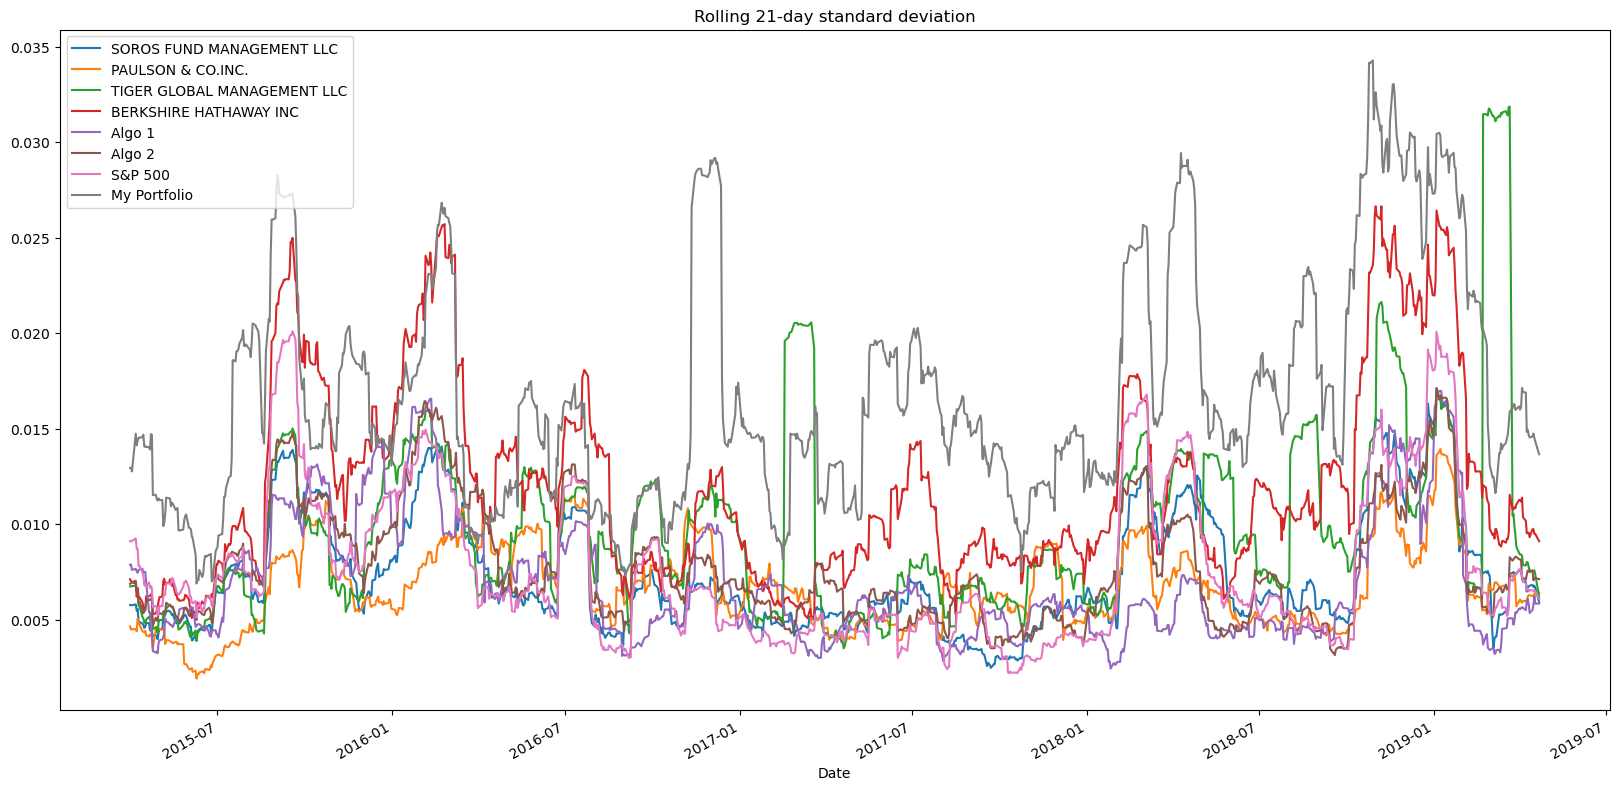

In [44]:
# Calculate rolling standard deviation
rolling_std_21_all = daily_returns.rolling(window=21).std()
print(rolling_std_21_all)

# Plot rolling standard deviation
rolling_std_21_all.plot(figsize=(20,10), title='Rolling 21-day standard deviation')

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823                     0.561040                0.754157  0.320901  0.826730  0.837731      0.600759
PAULSON & CO.INC.                             0.699823            1.000000                     0.434308                0.545451  0.268631  0.678085  0.669636      0.431421
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308                     1.000000                0.424125  0.164114  0.507160  0.623776      0.395348
BERKSHIRE HATHAWAY INC                        0.754157            0.545451                     0.424125                1.000000  0.291678  0.687756  0.751137      0.656010
Algo 1                                        0.320901            0.268631                     0.164114                0.291678  1.000000  0

<AxesSubplot:>

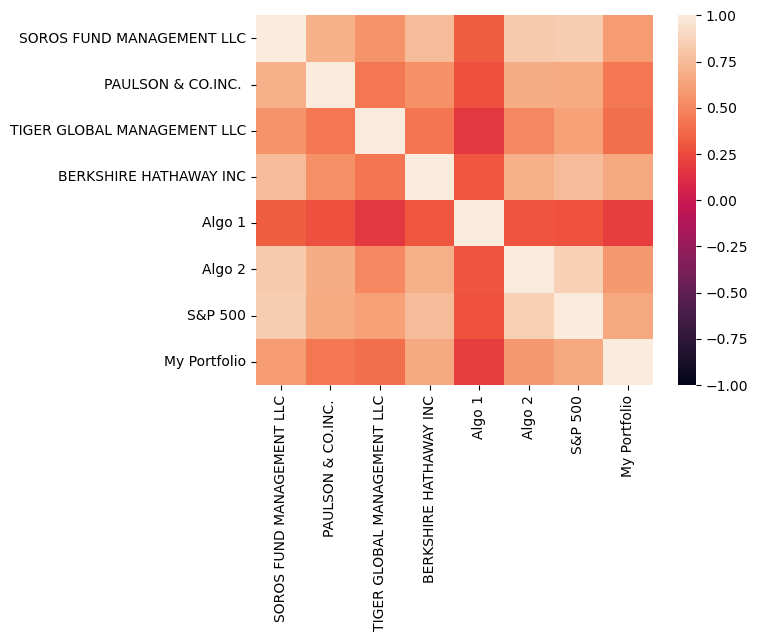

In [45]:
# Calculate and plot the correlation
correlation_all = daily_returns.corr()
print(correlation_all)
sbn.heatmap(correlation_all, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Covariance:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
SOROS FUND MANAGEMENT LLC                     0.000062            0.000039                     0.000048                0.000077  0.000019  0.000054  0.000057      0.000083
PAULSON & CO.INC.                             0.000039            0.000049                     0.000033                0.000050  0.000014  0.000040  0.000040      0.000053
TIGER GLOBAL MANAGEMENT LLC                   0.000048            0.000033                     0.000119                0.000060  0.000014  0.000046  0.000058      0.000076
BERKSHIRE HATHAWAY INC                        0.000077            0.000050                     0.000060                0.000167  0.000029  0.000074  0.000083      0.000149
Algo 1                                        0.000019            0.000014                     0.000014                0.000029 

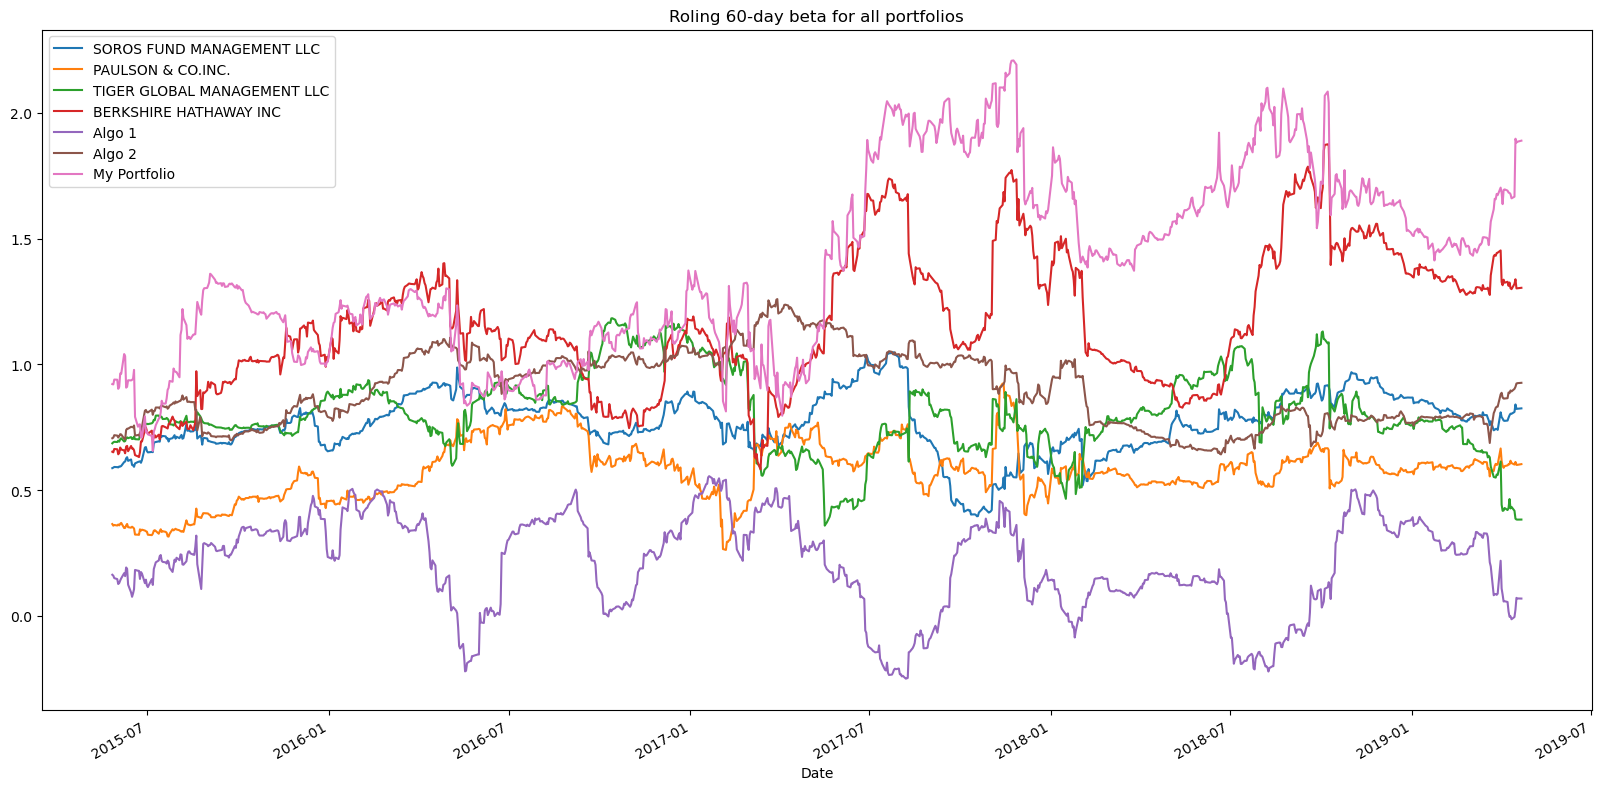

In [46]:
# Calculate and plot Beta
covariance_all = daily_returns.cov()
print("Covariance:")
print(covariance_all,'\n')

# Calculate variance of S&P 500
variance = daily_returns["S&P 500"].var()
print(f"Variance of S&P 500 is {variance}\n")

# Add beta to the summary table
performance_summary_all['Beta'] = ''

# Computing beta
for i, v in covariance_all.items():
    cov = covariance_all.loc[i, 'S&P 500']
    beta = round(cov/variance,2)
    print(f"Beta for {i} is {beta}")
    performance_summary_all.loc[i, 'Beta'] = beta

# Plot beta trend
rolling_variance = daily_returns["S&P 500"].rolling(window=60).var()
print(f"Rolling 30-day variance of S&P 500 is {rolling_variance}\n")
for i, v in daily_returns.items():
    if i != 'S&P 500':
        rolling_covariance = daily_returns[i].rolling(window=60).cov(daily_returns["S&P 500"])
        rolling_beta = rolling_covariance/rolling_variance
        ax = rolling_beta.plot(figsize=(20,10), label=i, title = 'Roling 60-day beta for all portfolios')
        ax.legend()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
print('Sharpe ratios:')
print(sharpe_ratios_all)

Sharpe ratios:
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                        0.633139
My Portfolio                   1.189098
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

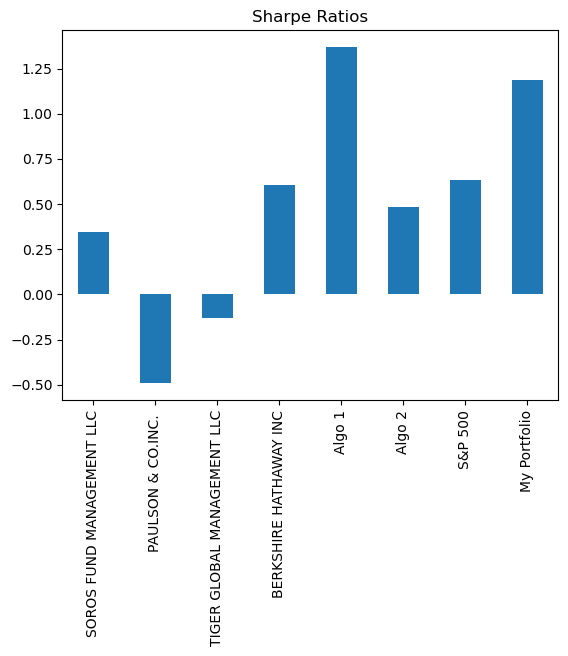

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar', title='Sharpe Ratios')

In [49]:
# Add sharpe ratio to the summary table
performance_summary_all['Sharpe Ratio'] = sharpe_ratios_all

# Print out the performance summary
performance_summary_all

,Annualized Return,Annualized std,Beta,Sharpe Ratio
SOROS FUND MANAGEMENT LLC,0.042981,0.125348,0.77,0.342894
PAULSON & CO.INC.,-0.054807,0.111527,0.55,-0.491422
TIGER GLOBAL MANAGEMENT LLC,-0.022521,0.172989,0.79,-0.130186
BERKSHIRE HATHAWAY INC,0.124430,0.205079,1.13,0.606743
Algo 1,0.165729,0.121006,0.25,1.369589
Algo 2,0.064132,0.132413,0.84,0.484334
S&P 500,0.085972,0.135787,1.0,0.633139
My Portfolio,0.331369,0.278672,1.35,1.189098


### How does your portfolio do?

Write your answer here!

My portfolio has the highest annualized return. It has a high std and a high beta value so it is quite volatile and risky. It has a high sharpe ratio, only second to Algo 1. Therefore it outperforms most of the other portfolios except Algo 1. It is a pretty good portfolio. 